# Assignment 2_One way Anova


BACKGROUND:
A new marketing campaign was tested in 12 randomly selected stores of a large retail group. Usual campaign was run in another 12 randomly selected stores during the same month. The outcome variable is “Sales Growth”.


QUESTIONS-
Is the new campaign more effective than usual campaign?
In the campaign testing, store numbers 1-4 and 13-16 are from ‘West’, 5-8 and 17-20 are from ‘South’ and 9-12 and 21-24 are from ‘East’. Test the effect of ‘Zone’ in this business experiment.

In [ ]:
# Is the new campaign more effective than usual campaign?

library(ggplot2)
library(dplyr)

marketing_data <- read.csv("/content/M2 T2_anova assignment data.csv")

# check data
head(marketing_data)
summary(marketing_data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,StoreNo,Growth,Zone,Campaign
,<int>,<dbl>,<chr>,<chr>
1,1,11.5,West,New
2,2,12.3,West,New
3,3,14.5,West,New
4,4,11.9,West,New
5,5,12.6,South,New
6,6,13.4,South,New


    StoreNo          Growth          Zone             Campaign        
 Min.   : 1.00   Min.   : 9.20   Length:24          Length:24         
 1st Qu.: 6.75   1st Qu.:10.03   Class :character   Class :character  
 Median :12.50   Median :11.30   Mode  :character   Mode  :character  
 Mean   :12.50   Mean   :11.48                                        
 3rd Qu.:18.25   3rd Qu.:12.75                                        
 Max.   :24.00   Max.   :14.50                                        

Campaign,Growth
<chr>,"<dbl[,6]>"
New,"9.5, 11.725, 12.25, 12.34167, 13.500, 14.5"
Usual,"9.2, 9.550, 10.20, 10.62500, 11.025, 14.1"


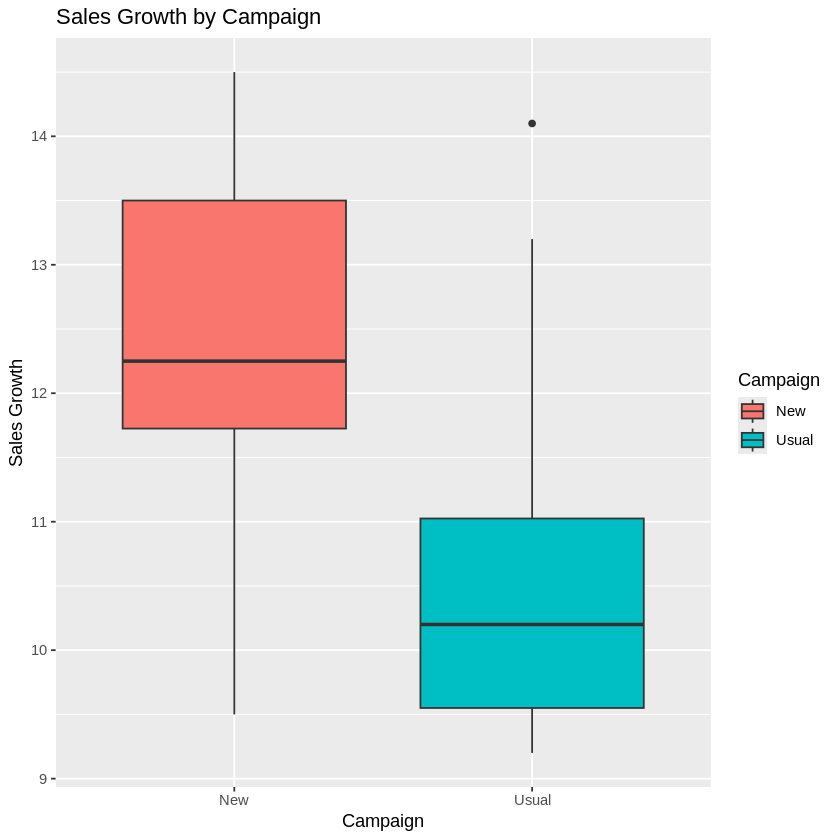

In [ ]:
# Summarize Growth by Campaign Type
aggregate(Growth ~ Campaign, data = marketing_data, summary)

# Visualize Growth by Campaign Type
ggplot(marketing_data, aes(x = Campaign, y = Growth, fill = Campaign)) +
  geom_boxplot() +
  labs(title = "Sales Growth by Campaign", y = "Sales Growth")


The sales growth under the new campaign appears to be higher overall compared to the usual campaign.

This suggests that the new campaign might be more effective than the usual campaign.

Zone,Growth
<chr>,"<dbl[,6]>"
East,"9.2, 10.175, 11.45, 11.5375, 12.600, 14.1"
South,"9.4, 9.575, 10.30, 10.7625, 11.400, 13.4"
West,"9.4, 11.200, 12.10, 12.1500, 13.425, 14.5"


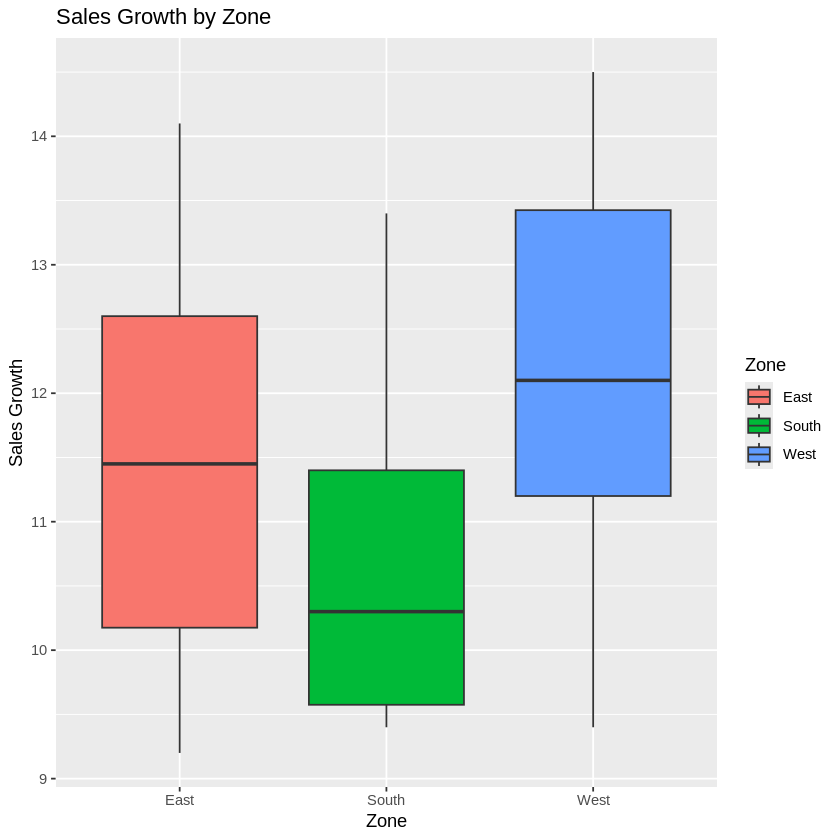

In [ ]:
# Summarize Growth by Zone
aggregate(Growth ~ Zone, data = marketing_data, summary)

# Visualize Growth by Zone
ggplot(marketing_data, aes(x = Zone, y = Growth, fill = Zone)) +
  geom_boxplot() +
  labs(title = "Sales Growth by Zone", y = "Sales Growth")

The West Zone has the highest median sales growth, followed by the East Zone, and finally the South Zone.

The West Zone also has the highest maximum growth value and a generally higher distribution of growth values.

These differences suggest that location may have an impact on sales growth

In [ ]:
# Check normality

shapiro.test(marketing_data$Growth[marketing_data$Campaign == "New"])
shapiro.test(marketing_data$Growth[marketing_data$Campaign == "Usual"])



	Shapiro-Wilk normality test

data:  marketing_data$Growth[marketing_data$Campaign == "New"]
W = 0.96844, p-value = 0.8938



	Shapiro-Wilk normality test

data:  marketing_data$Growth[marketing_data$Campaign == "Usual"]
W = 0.81075, p-value = 0.01245


Since the p-value is greater than 0.05 the sales growth data for the new campaign is normally distributed

Since the p-value is less than 0.05 the sales growth data for the usual campaign is not normally distributed

Since the new campaign data is normally distributed, but the usual campaign data is not, we should use a non-parametric test to compare the two campaigns effectively - The Mann-Whitney U test

In [ ]:
# Mann-Whitney U test
mann_whitney_result <- wilcox.test(Growth ~ Campaign, data = marketing_data, alternative = "greater")
print(mann_whitney_result)


Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Growth by Campaign
W = 116.5, p-value = 0.005511
alternative hypothesis: true location shift is greater than 0



In [ ]:
# Tied values occur when two or more observations have the same value. In this case means that some stores had identical sales growth numbers.
table(marketing_data$Growth)


 9.2  9.4  9.5  9.6  9.8 10.1 10.3 10.5   11 11.1 11.5 11.8 11.9 12.2 12.3 12.6 
   1    2    1    1    1    1    2    1    1    1    1    1    1    1    1    1 
13.2 13.4 13.8 14.1 14.5 
   1    1    1    2    1 

Three store have the same growth values 9.4 , 10.3 and 14.1. I ignore the as the sample size is reasonably large.

The p-value is significantly less than 0.05, we reject the null hypothesis.
This means that there is statistically significant evidence to conclude that the new marketing campaign results in greater sales growth compared to the usual campaign

In [ ]:
# Perform one-way ANOVA
anova_result <- aov(Growth ~ Zone, data = marketing_data)
summary(anova_result)

            Df Sum Sq Mean Sq F value Pr(>F)
Zone         2   7.74   3.868   1.353   0.28
Residuals   21  60.02   2.858               

The p-value is significantly greater than 0.05, we fail to reject the null hypothesis.
This indicates that there is no statistically significant difference in sales growth among the three zones (West, South, East)

In [ ]:
# Tukey's HSD for post-hoc analysis
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Growth ~ Zone, data = marketing_data)

$Zone
              diff        lwr      upr     p adj
South-East -0.7750 -2.9055813 1.355581 0.6359032
West-East   0.6125 -1.5180813 2.743081 0.7518379
West-South  1.3875 -0.7430813 3.518081 0.2509417



No need for it as one-way ANOVA test has shown that there is no statistically significant difference in sales growth among the three zones (West, South, East).

However, the Tukey test results indicate that there are no statistically significant differences in sales growth among the different zones (South, East, and West). This suggests that, based on the current data, location does not play a critical role in affecting sales growth in this marketing campaign.

In [ ]:
# Two-way ANOVA
two_way_anova <- aov(Growth ~ Campaign * Zone, data = marketing_data)
summary(two_way_anova)


              Df Sum Sq Mean Sq F value  Pr(>F)   
Campaign       1  17.68  17.682   8.408 0.00955 **
Zone           2   7.74   3.868   1.839 0.18759   
Campaign:Zone  2   4.48   2.240   1.065 0.36537   
Residuals     18  37.85   2.103                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Effect of Campaign: The campaign type has a significant effect on sales growth. This suggests that the new marketing campaign is effective in driving higher sales growth compared to the usual campaign.

Effect of Zone: There is no significant effect of the zone on sales growth. This indicates that sales growth does not vary significantly between the different zones.

Interaction Effect: There is no significant interaction effect between campaign type and zone. This suggests that the effect of the campaign on sales growth does not significantly differ by zone.

Conclusions: Implementing the new marketing campaign can enhance sales growth. The new campaign can be applied uniformly across all zones without the need for zone-specific adjustments.